In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [94]:
churn_data = pd.read_csv('churn.csv')
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


###Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

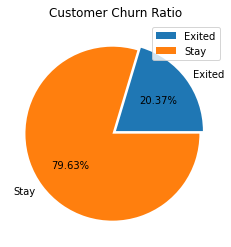

In [103]:
exited = [churn_data.Exited[churn_data['Exited']==1].count(), churn_data.Exited[churn_data['Exited']==0].count()]

plt.title("Customer Churn Ratio")
plt.pie(exited, labels = ["Exited", "Stay"], autopct='%.2f%%', explode = (0 , 0.05))
plt.legend(labels = ["Exited", "Stay"], loc = "upper right")
plt.show()

Осталось практически 80% клиентов

###Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

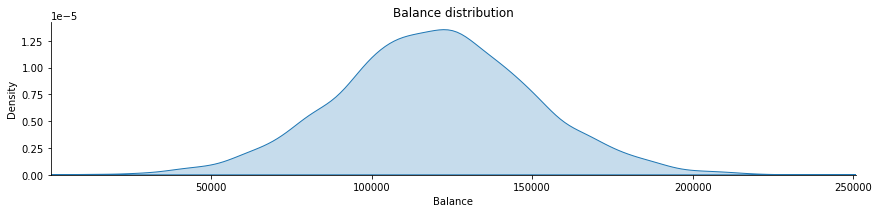

In [119]:
FacetGrid = sns.FacetGrid(churn_data[churn_data["Balance"] > 2500], aspect=4)
FacetGrid.map(sns.kdeplot, "Balance", shade=True )
FacetGrid.set(xlim=(16, churn_data["Balance"].max()))
FacetGrid.set_titles("Balance distribution")
plt.title("Balance distribution")
None

Баланс пользователей является нормальным распределением, большая часть пользователей имеет на счету от 100 до 150 тысяч долларов

###Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:156: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



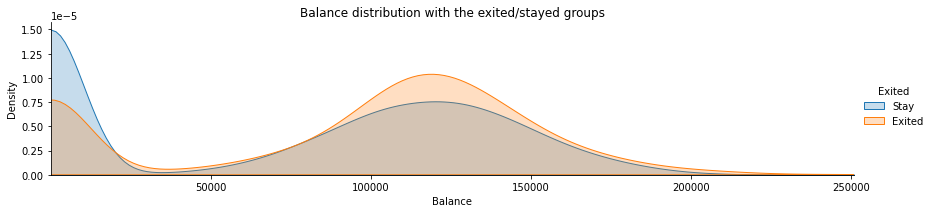

In [125]:
FacetGrid = sns.FacetGrid(churn_data, hue="Exited", aspect=4)
FacetGrid.map(sns.kdeplot, "Balance", shade=True )
FacetGrid.set(xlim=(16, churn_data["Balance"].max()))
FacetGrid.add_legend(labels = ["Stay", "Exited"])
plt.title("Balance distribution with the exited/stayed groups")
None

Оставшиеся клиенты в среднем держат на счетах денег меньше, чем ушедшие. Также значимая часть оставшихся клиентов не имеет денег на счете. Возможно, ушедших клиентов не устраивают проценты по накопительным счетам.

###Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:156: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



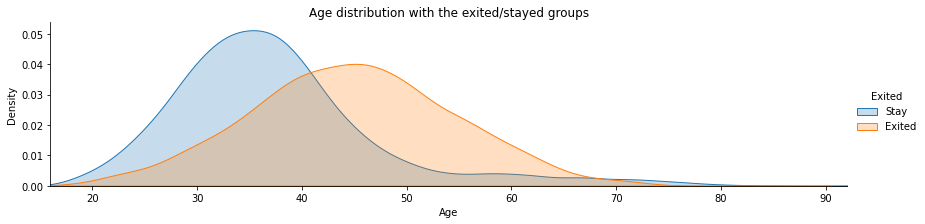

In [126]:
FacetGrid = sns.FacetGrid(churn_data, hue="Exited", aspect=4)
FacetGrid.map(sns.kdeplot, "Age", shade=True )
FacetGrid.set(xlim=(16, churn_data["Age"].max()))
FacetGrid.add_legend(labels = ["Stay", "Exited"])
plt.title("Age distribution with the exited/stayed groups")
None

Больше всего клиентов ушло в группе 40-50 лет, а осталось с группе 30-40 лет. Банку стоит обратить внимание на аудиторию 40+ лет, т.к. в ней количество ушедших пользователей сильно превышает количество оставшихся.

###Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

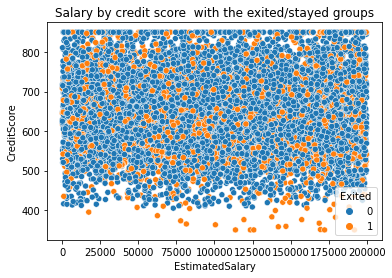

In [127]:
sns.scatterplot(data=churn_data, x="EstimatedSalary", y="CreditScore", hue="Exited")
plt.title("Salary by credit score  with the exited/stayed groups")
None

Особой взаимосвязи нет, все распределено равномерно

###Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



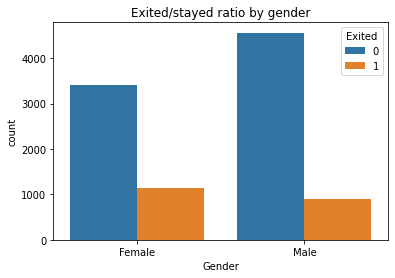

In [128]:
sns.countplot("Gender", hue = "Exited",data = churn_data)
plt.title("Exited/stayed ratio by gender")
None

Большая часть аудитории - мужчины, также они уходят чусть реже, чем женщины

###Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



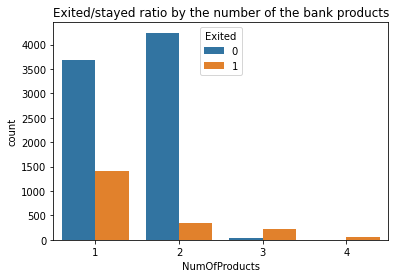

In [129]:
sns.countplot("NumOfProducts", hue = "Exited", data = churn_data)
plt.title("Exited/stayed ratio by the number of the bank products")
None

Больше всего активных клиентов приобрели 2 продукта, при этом наибольший отток у клиентов с одним продуктом. Количество клиентов активных с 3 и более продуктами заметно ниже, чем ушедших.

###Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



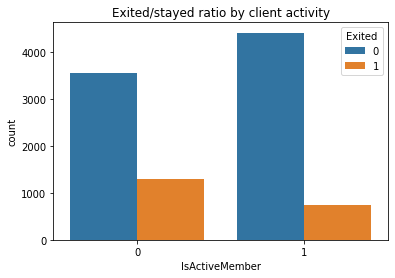

In [130]:
sns.countplot("IsActiveMember", hue = "Exited", data = churn_data)
plt.title("Exited/stayed ratio by client activity")
None

Активных клиентов больше, как у оставшихся среди них. В группе неактивных, напротив, преобладают ушедшие клиенты. Сложно предложить что-либо вне контекста, возможно, стоит постараться сделать их активными с помощью каких-либо промоакций.

###В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
map_df = churn_data.groupby("Geography", as_index=False).agg({"Exited": "sum", "CustomerId": "count"}).copy()
map_df["exited_percentage"] = pd.np.where(map_df['Exited'] < 0, map_df['Exited'], map_df['Exited'] / map_df['CustomerId'] * 100)
map_df

px.choropleth(
    data_frame=map_df,
    locations="Geography",
    locationmode = "country names",
    color="exited_percentage",
    range_color=[0, 100],
    title='Exited percentage by coutry',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
None

<ipython-input-28-a03ec4acffad>:2: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



Больше всего доля ушедших клиентов в Германии. Возможно, в этом регионе другие банки предлагают лучшие условия, тем самым переманивая клиентов.

###Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [132]:
churn_data["CreditScoreCat"] = churn_data["CreditScore"].apply(lambda x: get_credit_score_cat(x))
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Good
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Good
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Good


####Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

In [ ]:
pivot = churn_data.pivot_table(
    values="Exited",
    columns="Tenure",
    index="CreditScoreCat"
)
pivot

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


####На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

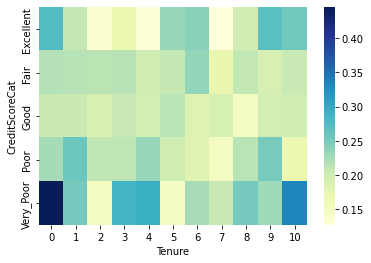

In [ ]:
sns.heatmap(data=pivot, cmap='YlGnBu')
None

Больше всего доля ушедших клиентов в категории **Very_Poor**, которые пользуются банком менее года. На втором месте по доле оттока эта же категория, но клиенты в ней пользуются услугами банка более 10 лет.